In [1]:
import pandas as pd
import matplotlib.pyplot as plt

import yfinance as yf
import datetime

from valueinvesting import utils as utils

# 1. Load raw input
## Hardcoded block

In [2]:
evaluate_last_X_years = True
X=10
currency_pair = 'NOK=X'
numbers_in_currency = 'NOK'
share_name = 'ORK.OL'

# 1.2. Raw input statement data

In [3]:
route = f"../data/input/{share_name}_data.csv"
data = pd.read_csv(route, sep=';', parse_dates=['date', 'real_date'])
# replace -, extend missing 0-s, fix datatype
data = utils.replace_format_input(data)

In [4]:
owned_shares = pd.read_csv('../data/extras/owned_stocks.csv', sep=';', parse_dates=['date'])
owned_shares = owned_shares.loc[(owned_shares['stock'] == share_name) & (owned_shares['active'] == 'yes')]

## (OPTIONAL) Time Filtering - Last 7 years daat

In [5]:
if evaluate_last_X_years:
    data = data[data['date'] > datetime.datetime.today() - datetime.timedelta(days=X*366+93)]
    data = data.reset_index(drop=True)

data.head()

,date,revenue,cogs,gross_profit,net_profit,cash,acc_rec,inventory,curr_assets,goodwill,...,acc_pay,short_term_debt,current_debt,curr_liab,long_term_debt,total_liab,cash_from_operating_activities,capex,shares,real_date
0,2014-09-30,7487,-6384,1103,664,1653,5208,4194,16388,0,...,0,0,990,8412,9411,21568,710,-228,1018.93,2014-10-25
1,2014-12-31,8119,-6863,1256,322,2615,4413,4073,13004,0,...,3221,0,598,6599,8510,19053,1336,-368,1018.93,2015-02-09
2,2015-03-31,7541,-6578,963,640,2116,4830,4240,12874,0,...,3486,0,665,6890,8503,19280,382,-276,1018.93,2015-05-05
3,2015-06-30,7705,-6643,1062,1125,839,4557,4452,11774,0,...,3400,0,481,6421,8375,18756,768,-185,1018.93,2015-07-14
4,2015-09-30,8381,-7123,1258,829,1105,5242,5012,13159,0,...,3711,0,370,6947,10310,21751,1014,-331,1018.93,2015-10-25


## Calculate date when quaterly reports could be available

In [6]:
data = utils.calculate_real_date(data)

# 2. Filter out unnecesary columns

In [7]:
data = utils.filter_raw_data(data)
data.tail()

,date,real_date,shares,revenue,cogs,gross_profit,net_profit,cash,acc_rec,inventory,...,intangible_assets,total_assets,acc_pay,short_term_debt,current_debt,curr_liab,long_term_debt,total_liab,cash_from_operating_activities,capex
35,2023-06-30,2023-07-14,1001.43,17087,-14660,2427,1427,1124,9093,11354,...,36522,88769,8336,0,5395,19216,17256,45071,1065,-690
36,2023-09-30,2023-10-25,1001.43,16783,-14225,2558,1618,1054,8984,10530,...,35604,86376,8403,0,5722,19437,14137,41891,2966,-578
37,2023-12-31,2024-02-09,1001.43,17739,-15368,2371,1050,991,8661,10135,...,35822,86592,8573,0,3315,17049,15663,41325,2469,-749
38,2024-03-31,2024-04-29,997.76,17107,-14675,2432,1514,1008,9623,10281,...,36611,88907,8662,0,5579,19551,14627,39621,1278,-409
39,2024-06-30,2024-07-08,998.51,17244,-14543,2023,2148,1143,9101,10271,...,36128,88364,8275,0,5422,18815,16767,41051,1621,-495


## Pull historical average USD national currency rates and add to the dataframe

In [8]:
data['usd_nat_currency'] = utils.daily_price(
    ticker=currency_pair,
    end=data['date'],
    days_earlier=90
    )

# drop rows, when USD rates wasn't available
data = data[data['usd_nat_currency'].notna()]

data.tail()

,date,real_date,shares,revenue,cogs,gross_profit,net_profit,cash,acc_rec,inventory,...,total_assets,acc_pay,short_term_debt,current_debt,curr_liab,long_term_debt,total_liab,cash_from_operating_activities,capex,usd_nat_currency
35,2023-06-30,2023-07-14,1001.43,17087,-14660,2427,1427,1124,9093,11354,...,88769,8336,0,5395,19216,17256,45071,1065,-690,10.699984
36,2023-09-30,2023-10-25,1001.43,16783,-14225,2558,1618,1054,8984,10530,...,86376,8403,0,5722,19437,14137,41891,2966,-578,10.483742
37,2023-12-31,2024-02-09,1001.43,17739,-15368,2371,1050,991,8661,10135,...,86592,8573,0,3315,17049,15663,41325,2469,-749,10.821103
38,2024-03-31,2024-04-29,997.76,17107,-14675,2432,1514,1008,9623,10281,...,88907,8662,0,5579,19551,14627,39621,1278,-409,10.502364
39,2024-06-30,2024-07-08,998.51,17244,-14543,2023,2148,1143,9101,10271,...,88364,8275,0,5422,18815,16767,41051,1621,-495,10.750878


## Convert USD values related to IS, BS, CFS to national currency

In [9]:
# convert columns into national currency if necessary
if numbers_in_currency == 'USD':
    data_nat_curr = utils.convert_national_currency(input_data=data, currency=data)
else:
    data_nat_curr = data.copy()
data_nat_curr.tail()

,date,real_date,shares,revenue,cogs,gross_profit,net_profit,cash,acc_rec,inventory,...,total_assets,acc_pay,short_term_debt,current_debt,curr_liab,long_term_debt,total_liab,cash_from_operating_activities,capex,usd_nat_currency
35,2023-06-30,2023-07-14,1001.43,17087,-14660,2427,1427,1124,9093,11354,...,88769,8336,0,5395,19216,17256,45071,1065,-690,10.699984
36,2023-09-30,2023-10-25,1001.43,16783,-14225,2558,1618,1054,8984,10530,...,86376,8403,0,5722,19437,14137,41891,2966,-578,10.483742
37,2023-12-31,2024-02-09,1001.43,17739,-15368,2371,1050,991,8661,10135,...,86592,8573,0,3315,17049,15663,41325,2469,-749,10.821103
38,2024-03-31,2024-04-29,997.76,17107,-14675,2432,1514,1008,9623,10281,...,88907,8662,0,5579,19551,14627,39621,1278,-409,10.502364
39,2024-06-30,2024-07-08,998.51,17244,-14543,2023,2148,1143,9101,10271,...,88364,8275,0,5422,18815,16767,41051,1621,-495,10.750878


# 3. Calculate input to Value Raios (eps, bv per share, fcf)
## filter out unwanted columns

In [10]:
filtered_nat_curr = utils.calculate_input_value_ratios(data_nat_curr)

## Calculate input values to value ratios

In [11]:
ratios_nat_curr = utils.ratios_input_filter(filtered_nat_curr)

In [12]:
ratios_nat_curr = utils.evaluate_performance(input=filtered_nat_curr, output=ratios_nat_curr)

# 4. Pull historical share prices and merge with sattement data
## Pull historical share prices

In [13]:
# pull weekly share prices and merge with the value ratios
merged_nat_curr = utils.add_share_prices_to_value_ratios(share_name, data, ratios_nat_curr)
merged_nat_curr.head()

,real_date,share_price,date,revenue,eps,bv_per_share,shares,fcf,fcf_per_share,cash,...,equity_ratio,debt_ratio,acc_rec_ratio,acc_pay_ratio,cash_turnover,inventory_turnover,gross_profit_margin,net_profit_margin,roa,roe
0,2014-10-27,32.558624,2014-09-30,7487.0,0.0,28.935256,1018.93,0.0,0.0,1653.0,...,0.577521,0.422479,0.0,0.0,0.0,0.0,0.147322,0.088687,0.0,0.0
1,2014-11-03,33.253376,2014-09-30,7487.0,0.0,28.935256,1018.93,0.0,0.0,1653.0,...,0.577521,0.422479,0.0,0.0,0.0,0.0,0.147322,0.088687,0.0,0.0
2,2014-11-10,33.695488,2014-09-30,7487.0,0.0,28.935256,1018.93,0.0,0.0,1653.0,...,0.577521,0.422479,0.0,0.0,0.0,0.0,0.147322,0.088687,0.0,0.0
3,2014-11-17,33.758652,2014-09-30,7487.0,0.0,28.935256,1018.93,0.0,0.0,1653.0,...,0.577521,0.422479,0.0,0.0,0.0,0.0,0.147322,0.088687,0.0,0.0
4,2014-11-24,32.969158,2014-09-30,7487.0,0.0,28.935256,1018.93,0.0,0.0,1653.0,...,0.577521,0.422479,0.0,0.0,0.0,0.0,0.147322,0.088687,0.0,0.0


# Calculate price ratios (P/E, P/B, P/S, P/FCF)

In [14]:
merged_nat_curr = utils.price_ratios(merged_nat_curr)
merged_nat_curr.head()

,real_date,share_price,date,revenue,eps,bv_per_share,shares,fcf,fcf_per_share,cash,...,inventory_turnover,gross_profit_margin,net_profit_margin,roa,roe,pe_ratio,pb_ratio,ps_ratio,ev_revenue,pfcf_ratio
0,2014-10-27,32.558624,2014-09-30,7487.0,0.0,28.935256,1018.93,0.0,0.0,1653.0,...,0.0,0.147322,0.088687,0.0,0.0,inf,1.125223,inf,inf,inf
1,2014-11-03,33.253376,2014-09-30,7487.0,0.0,28.935256,1018.93,0.0,0.0,1653.0,...,0.0,0.147322,0.088687,0.0,0.0,inf,1.149234,inf,inf,inf
2,2014-11-10,33.695488,2014-09-30,7487.0,0.0,28.935256,1018.93,0.0,0.0,1653.0,...,0.0,0.147322,0.088687,0.0,0.0,inf,1.164513,inf,inf,inf
3,2014-11-17,33.758652,2014-09-30,7487.0,0.0,28.935256,1018.93,0.0,0.0,1653.0,...,0.0,0.147322,0.088687,0.0,0.0,inf,1.166696,inf,inf,inf
4,2014-11-24,32.969158,2014-09-30,7487.0,0.0,28.935256,1018.93,0.0,0.0,1653.0,...,0.0,0.147322,0.088687,0.0,0.0,inf,1.139411,inf,inf,inf


# Calculate Dividend yield and currency-share price correlation

In [15]:
# get daily historical USD-national currency rates
usd_nat_curr = utils.get_historical_currency_rate(currency_pair, merged_nat_curr)

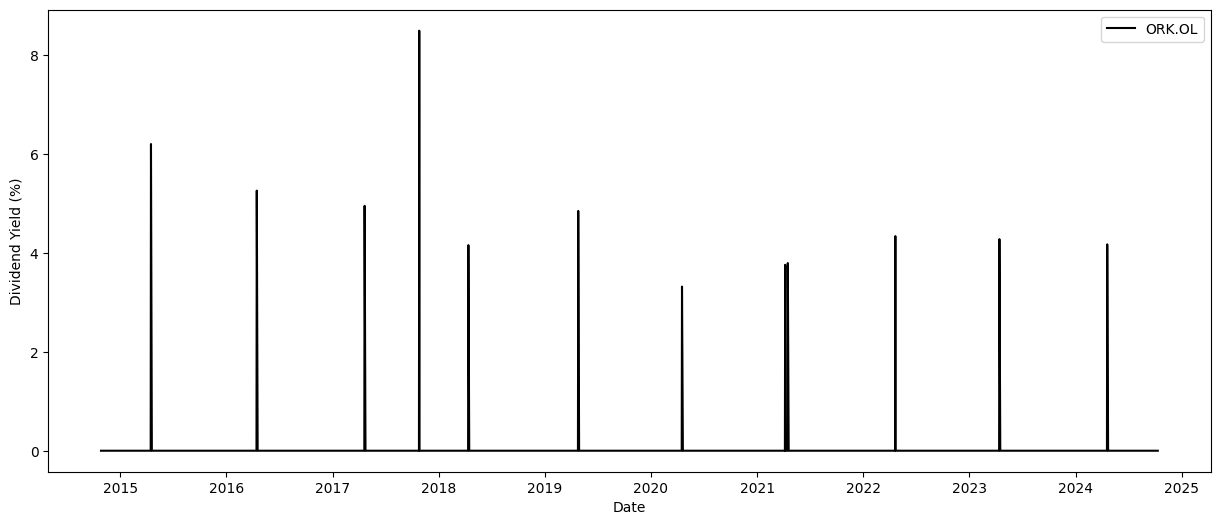

In [16]:
# get share prices and dividend yield data
ticker_all_price = utils.get_historical_share_dividend(share_name, merged_nat_curr)

currency_rate    0.73659
share_price      1.00000
Name: share_price, dtype: float64


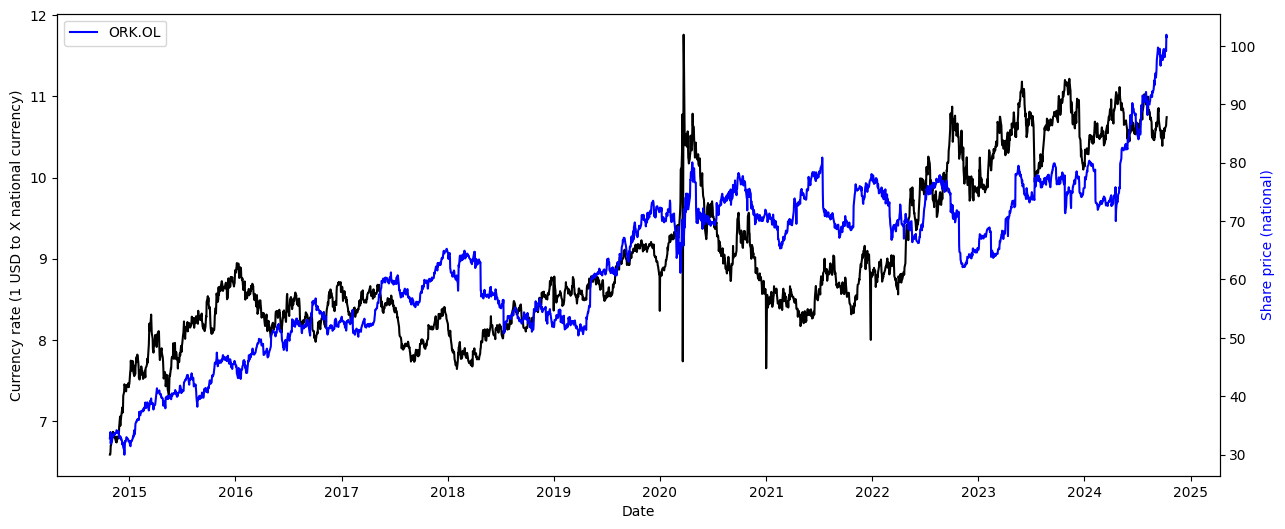

In [17]:
# Pearson's correlation coefficient between share price and USD - national currency rate
utils.get_currency_share_price_correlation(share_name, usd_nat_curr, ticker_all_price)

# Share price and value ratios

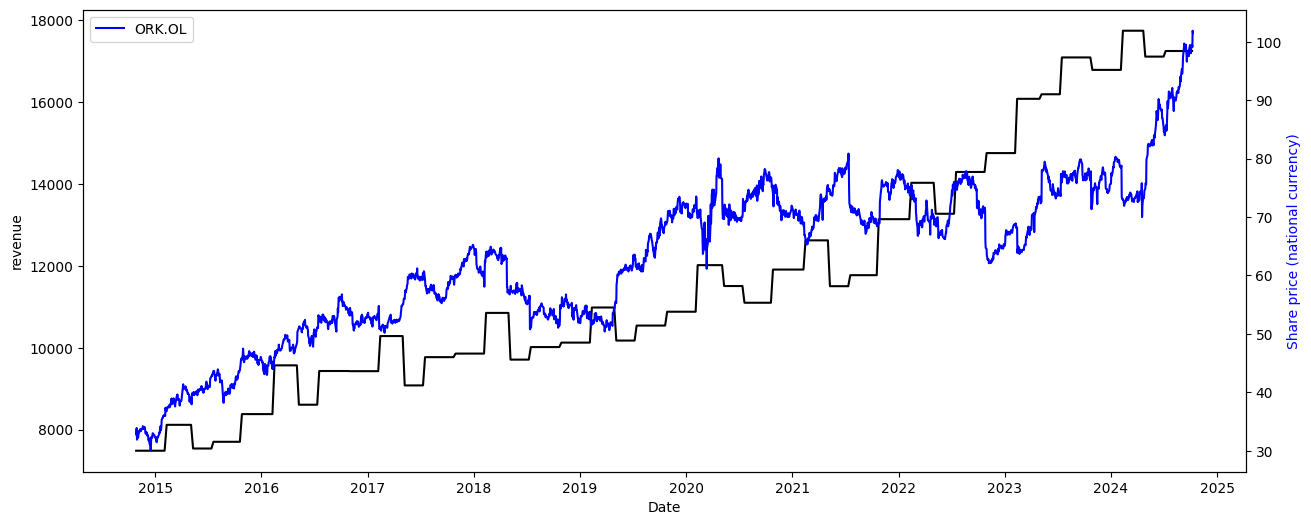

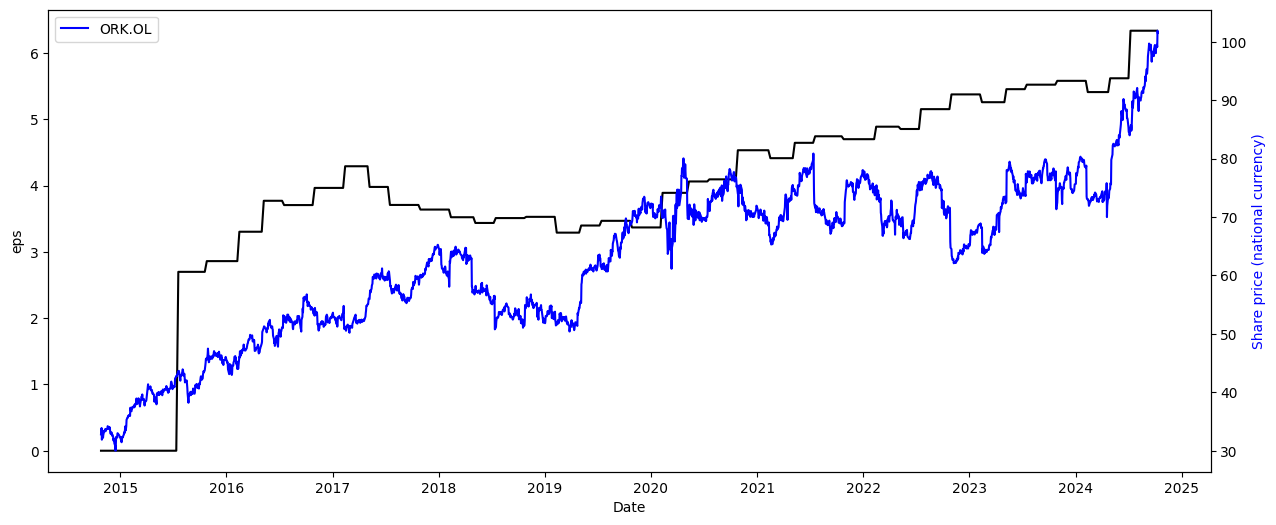

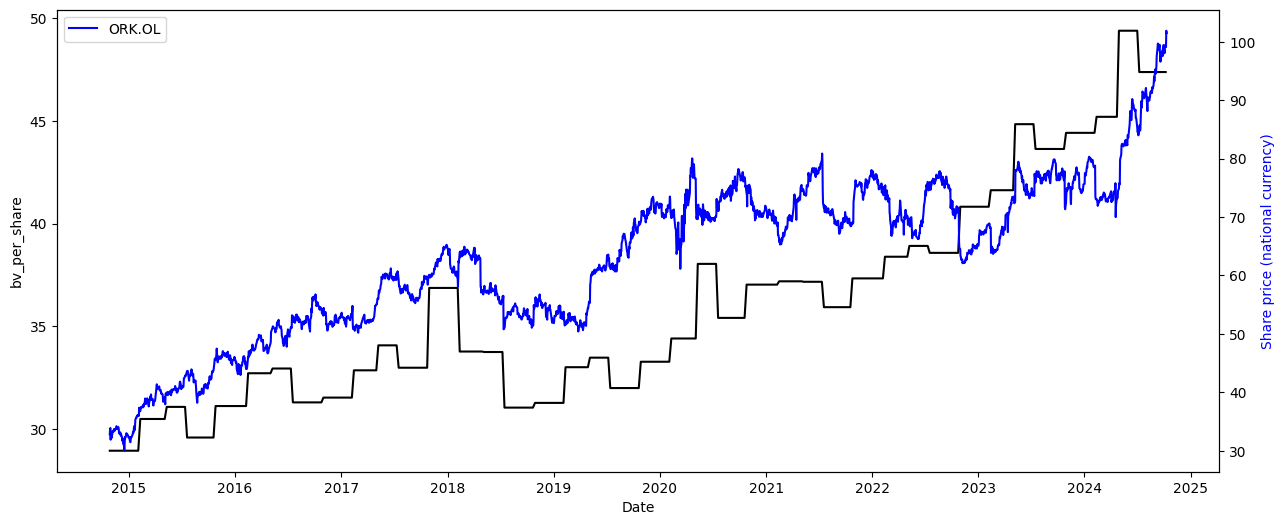

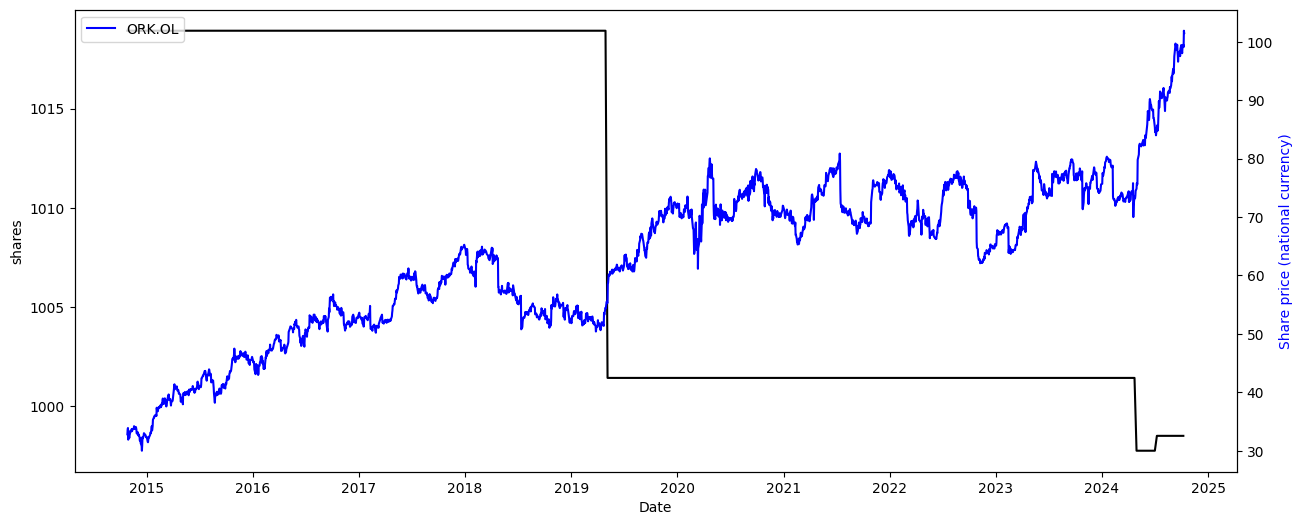

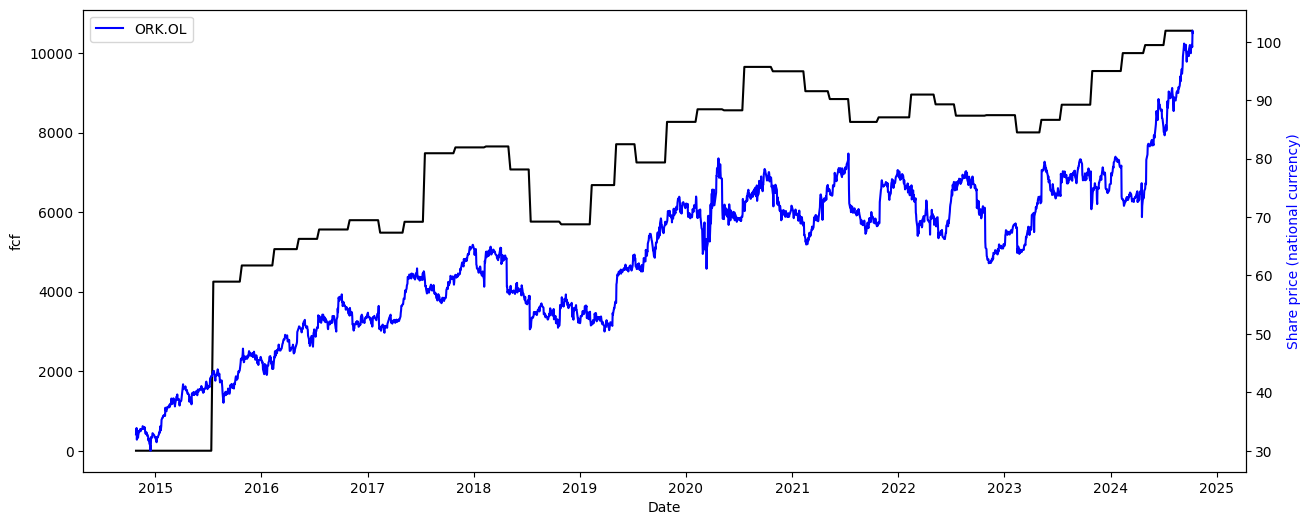

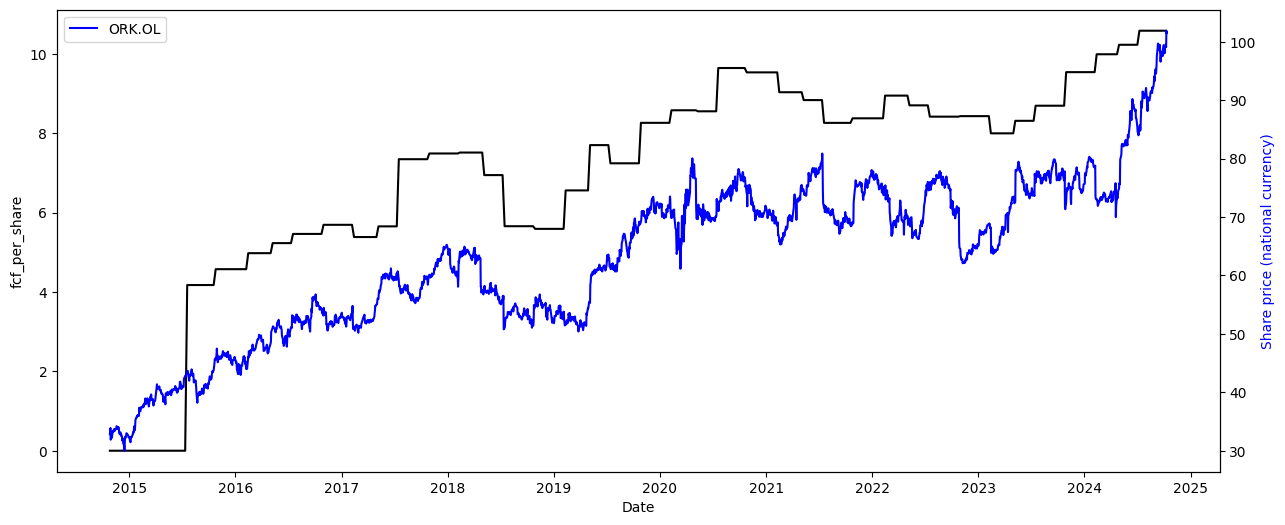

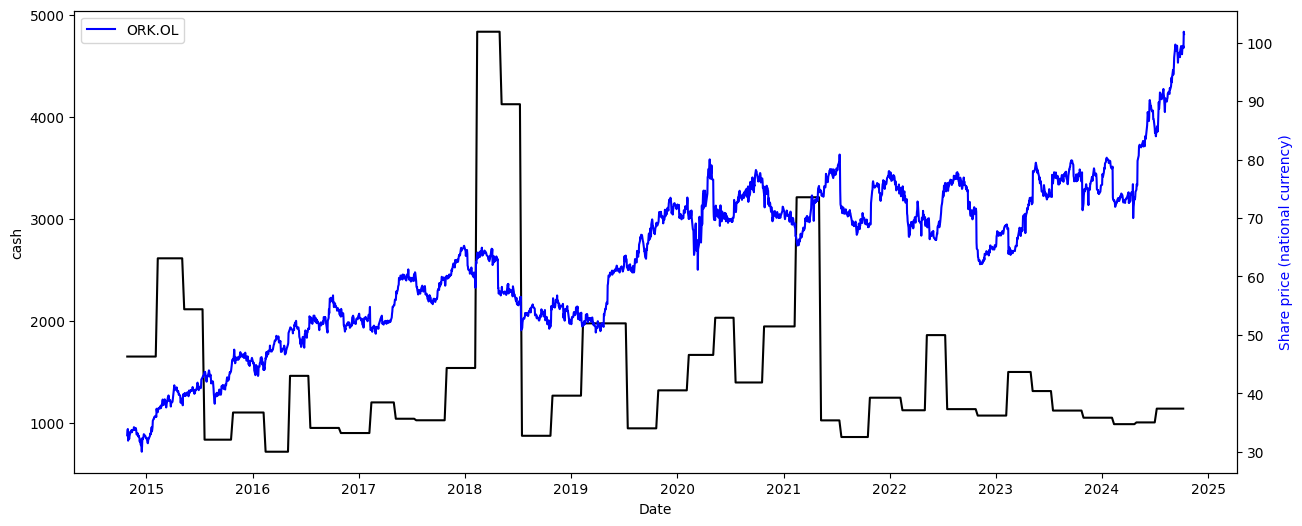

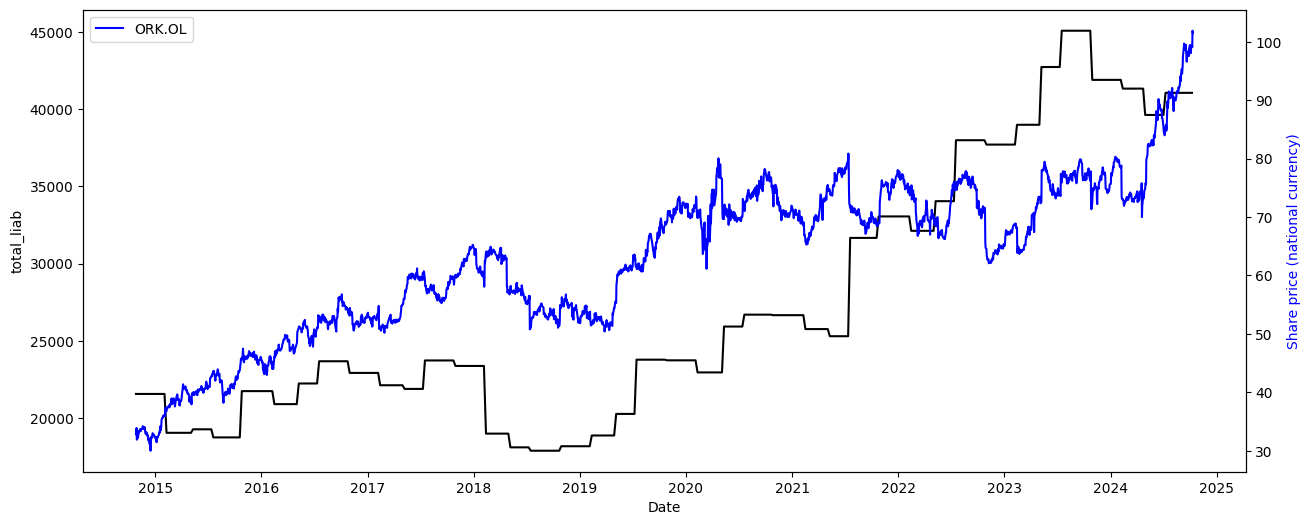

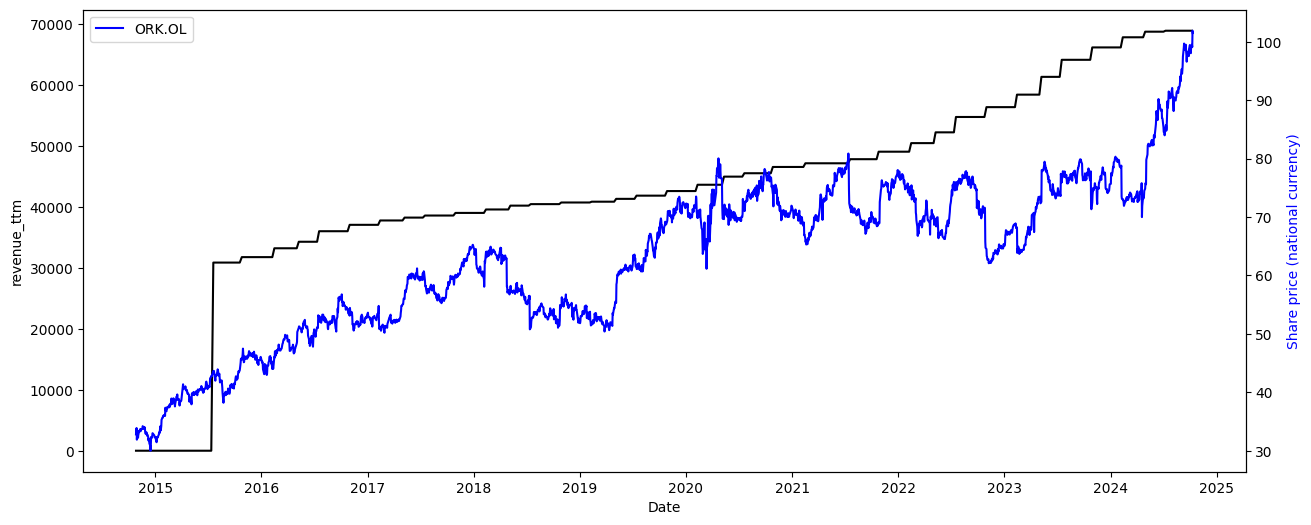

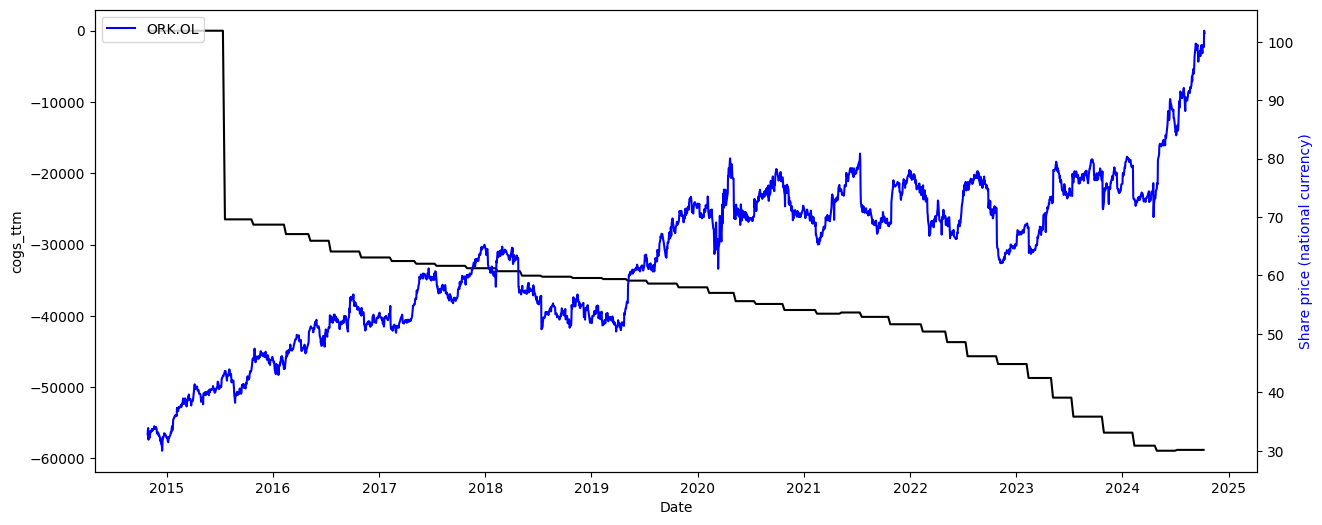

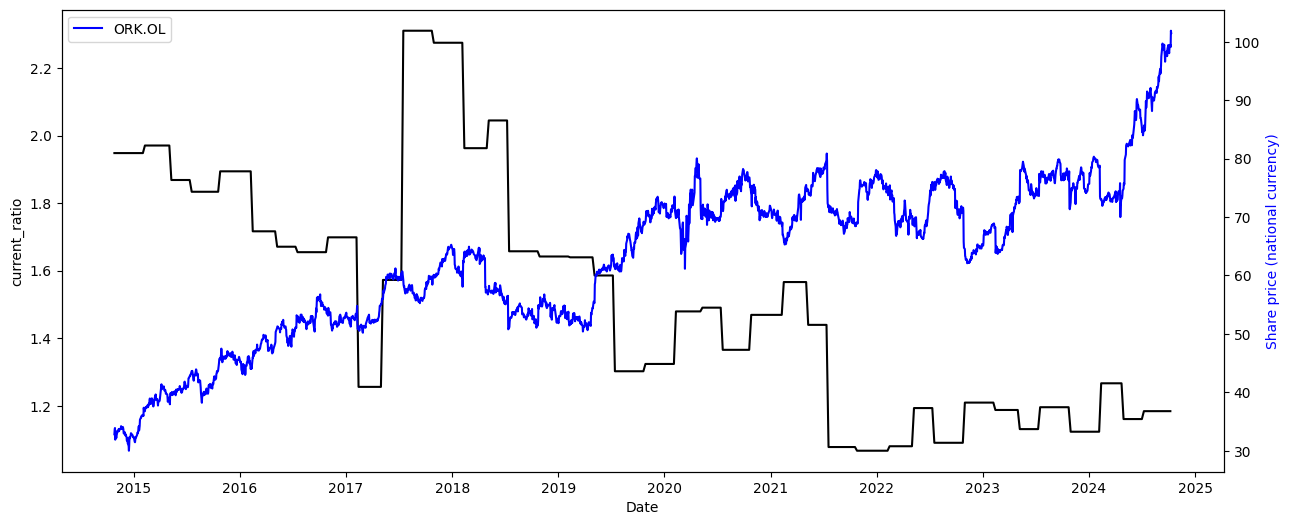

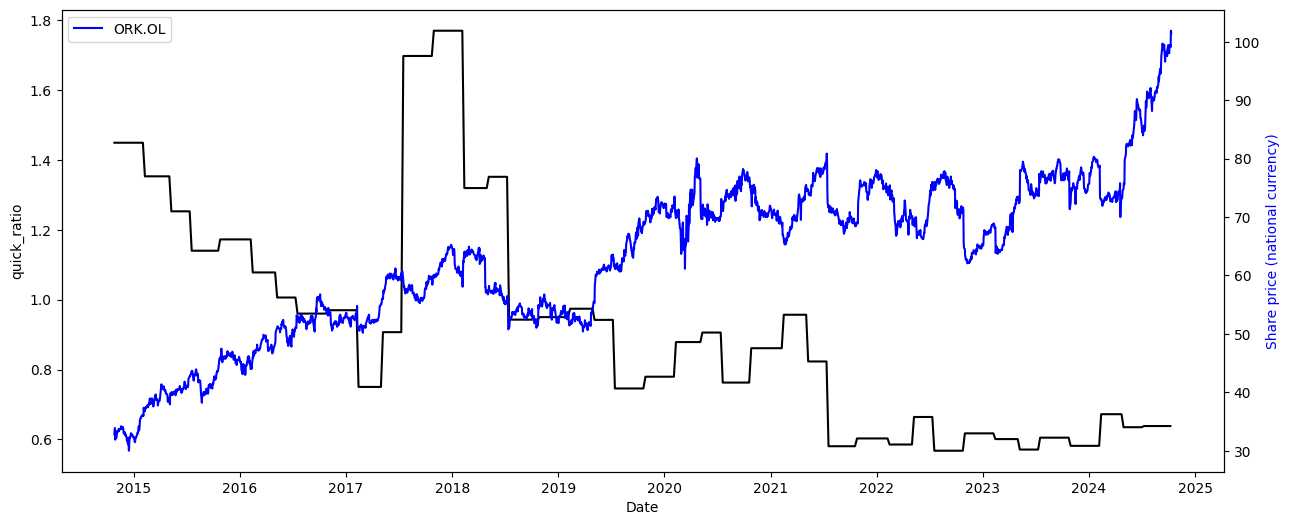

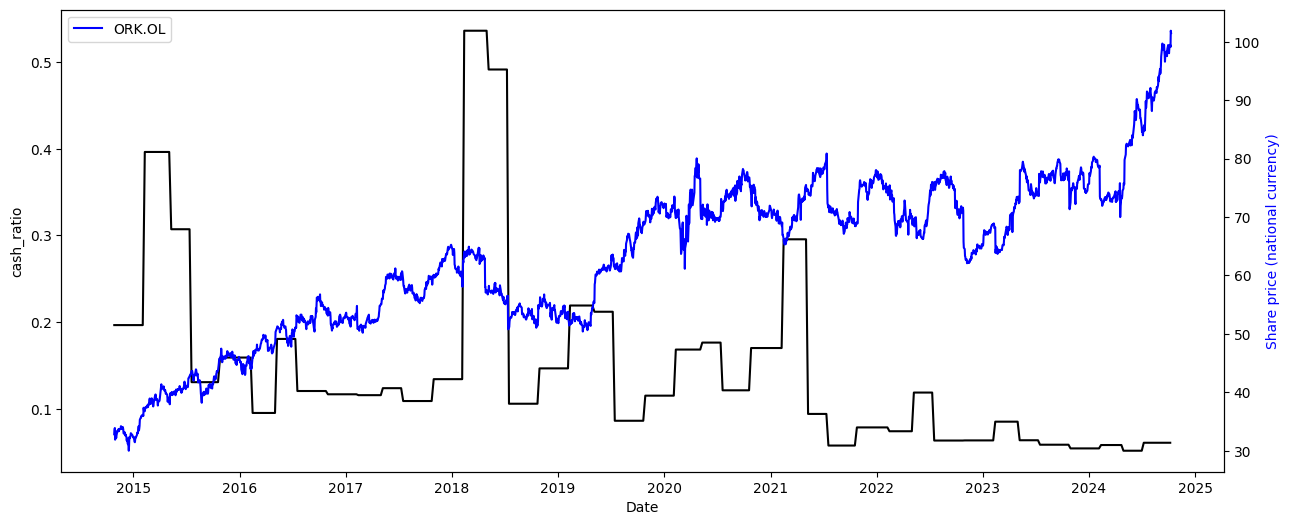

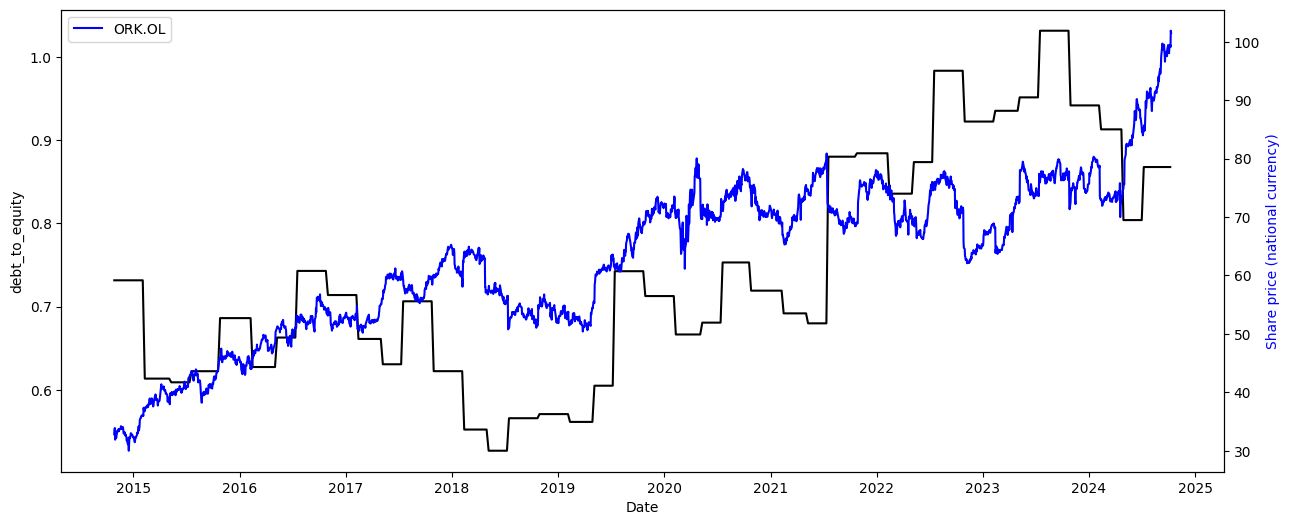

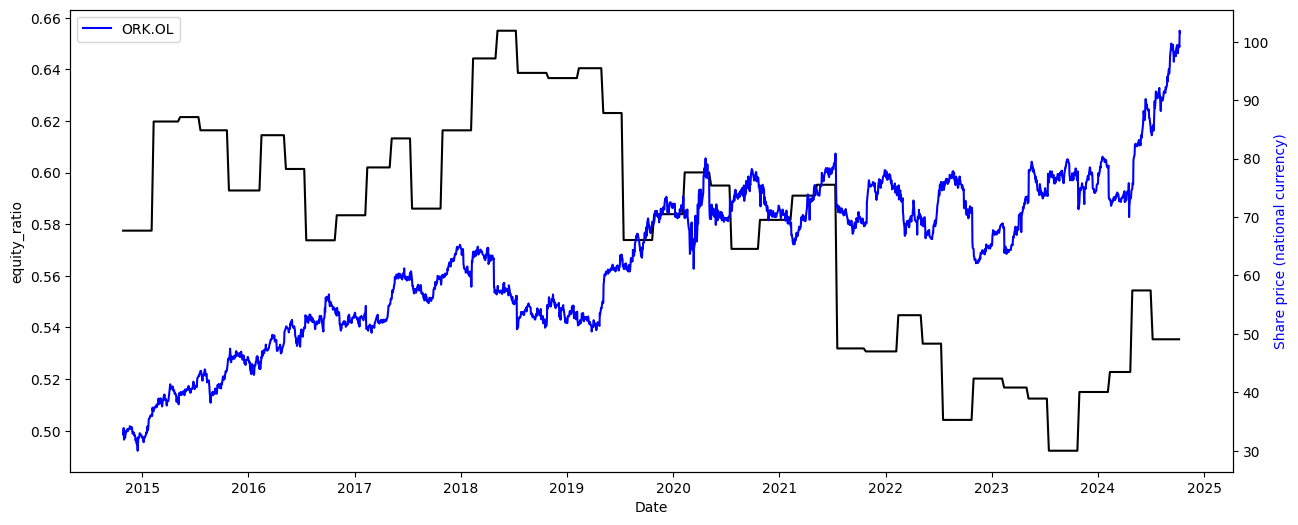

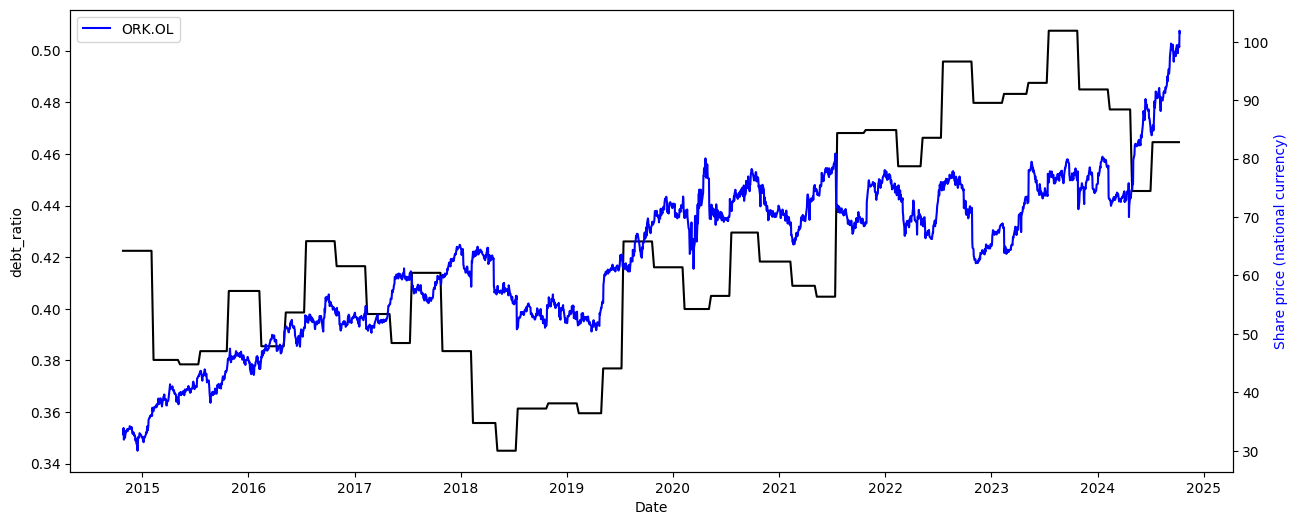

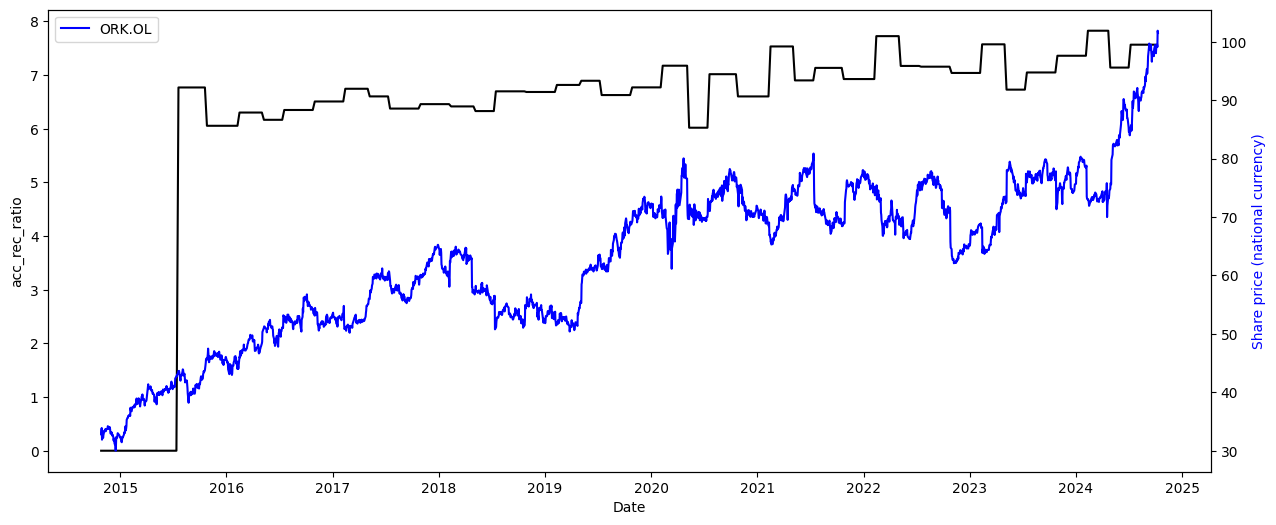

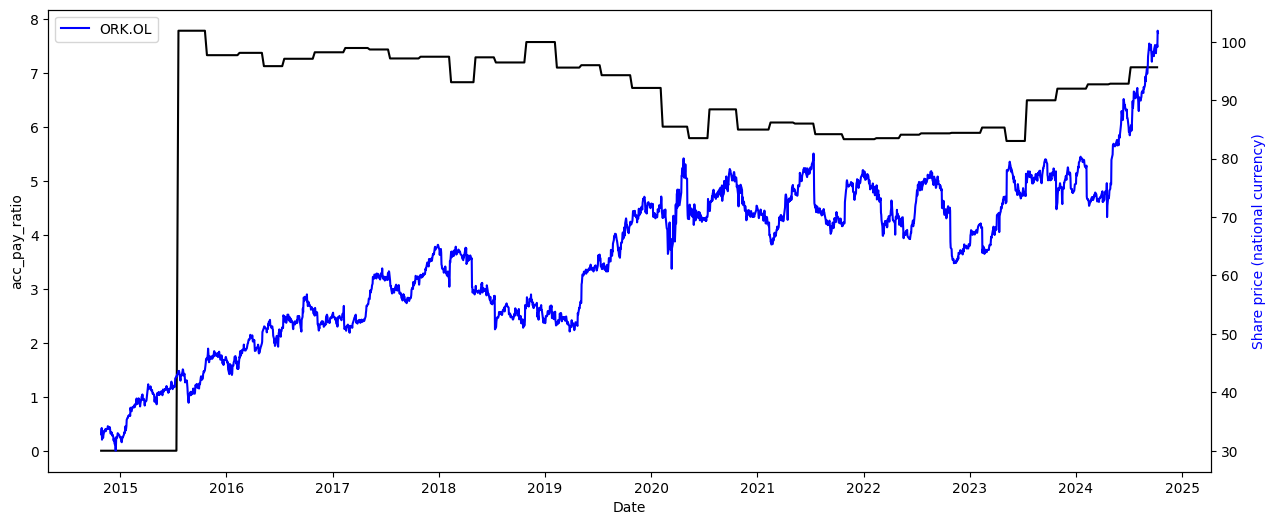

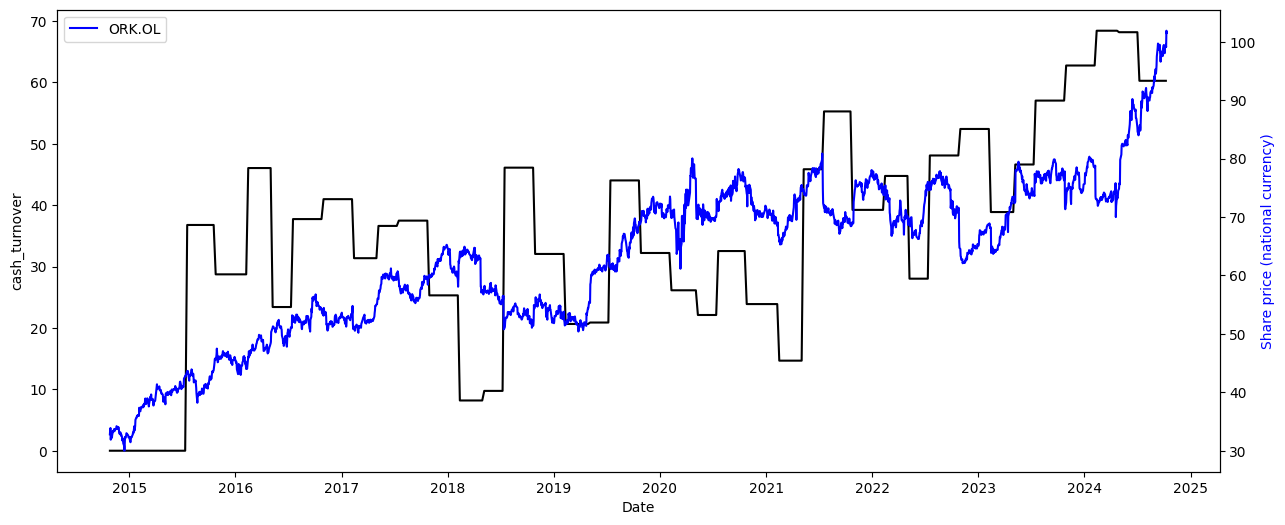

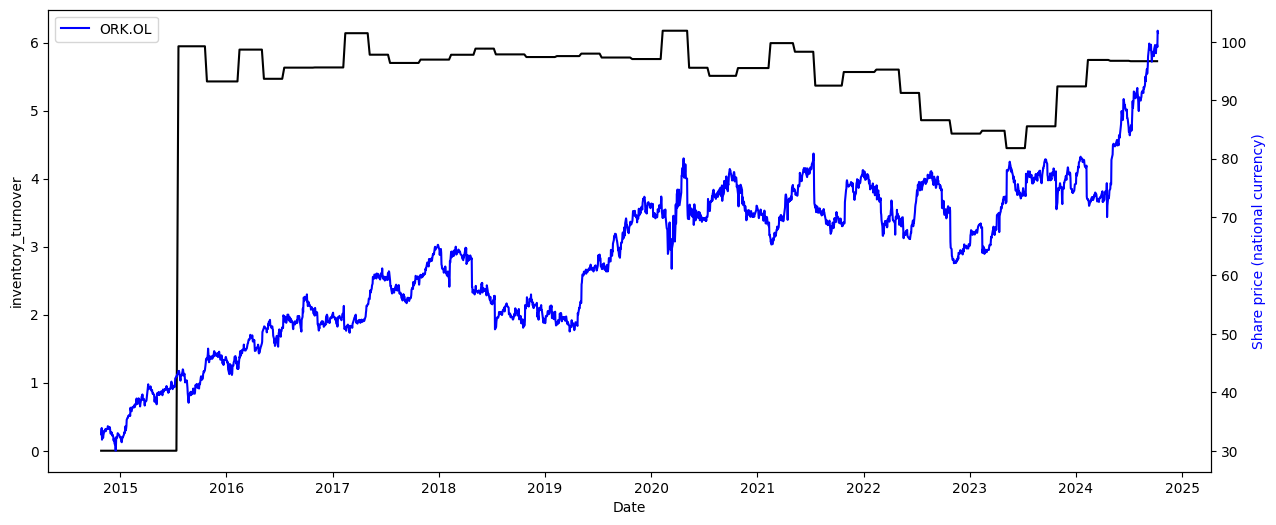

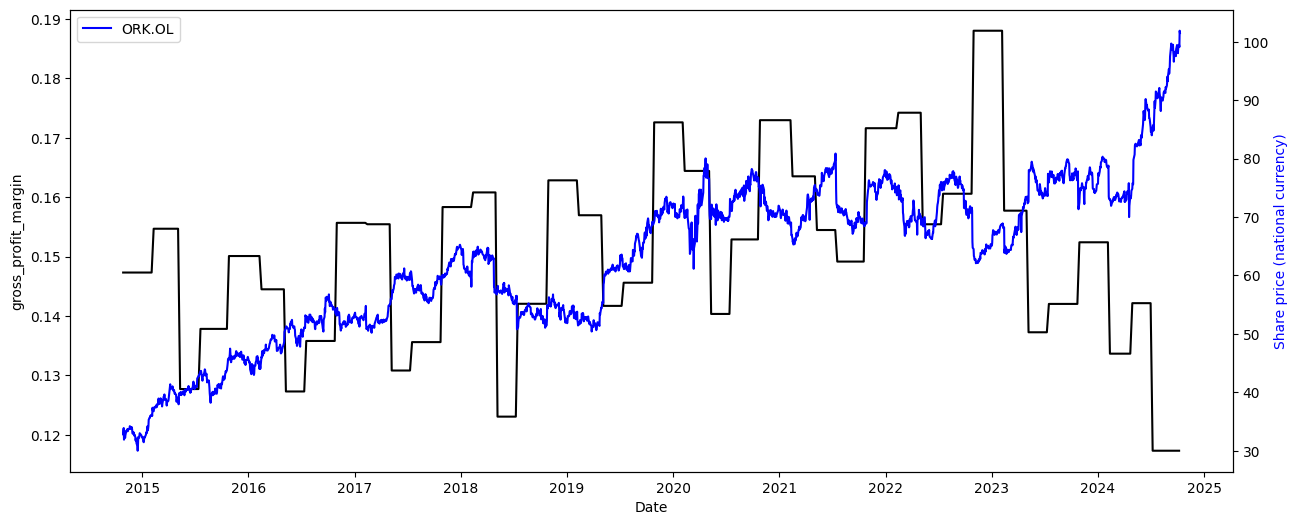

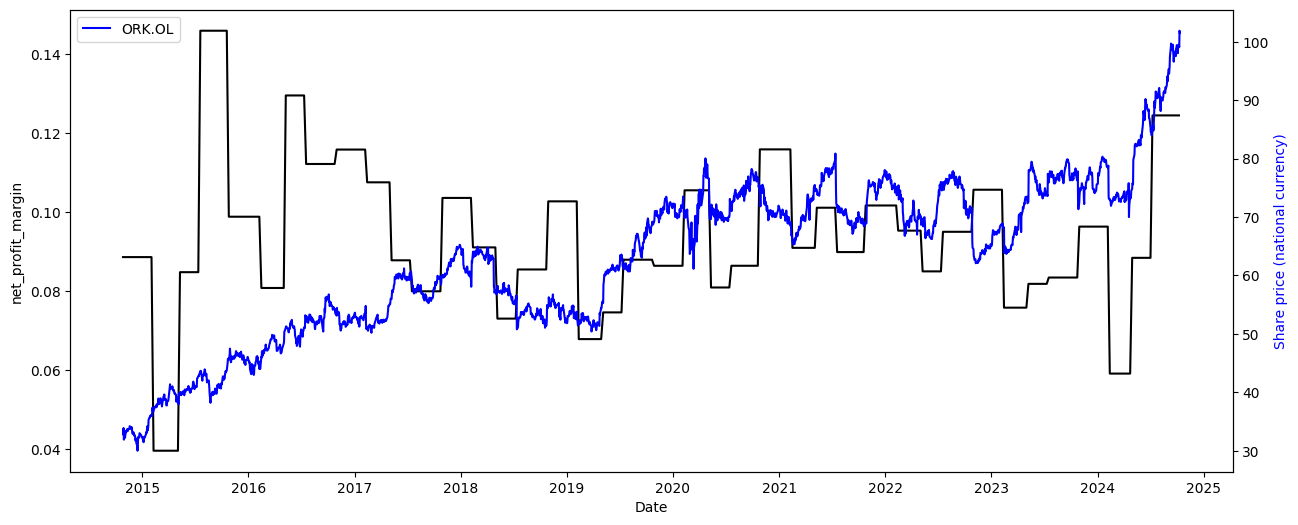

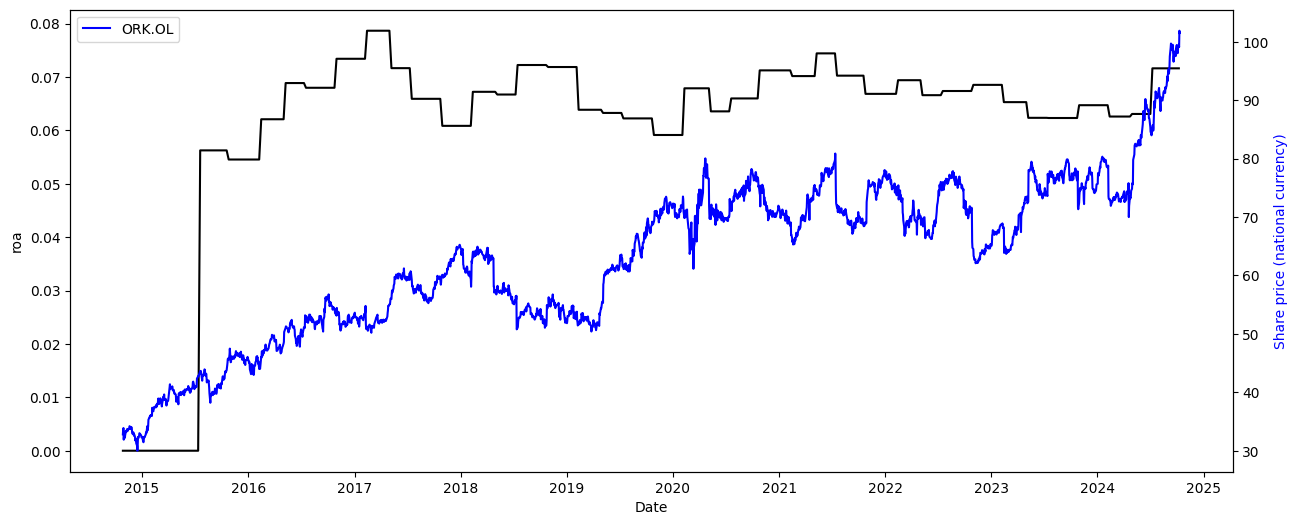

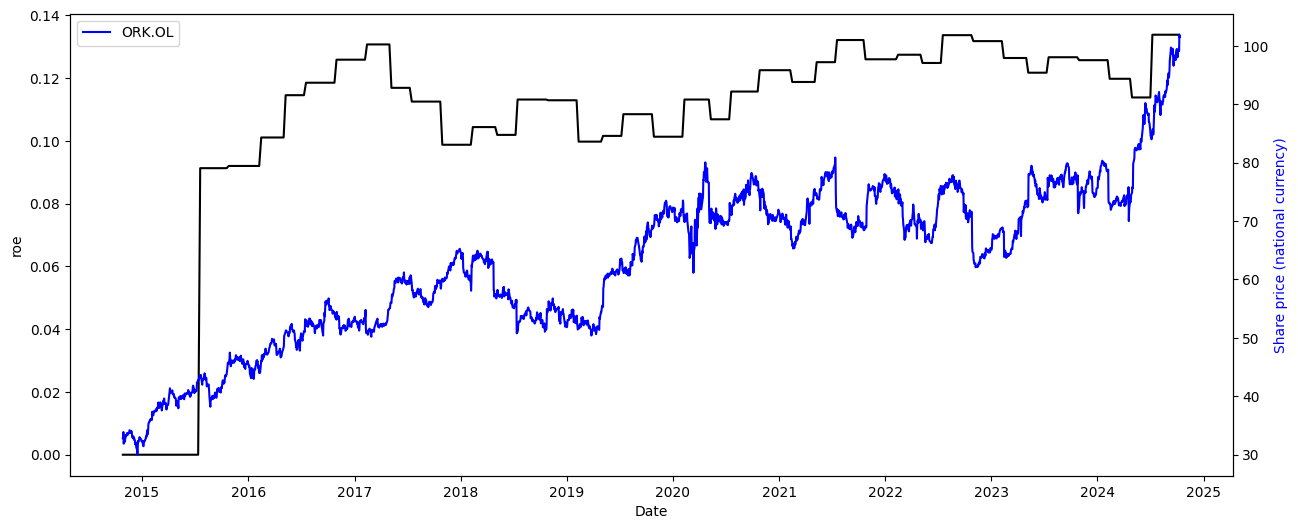

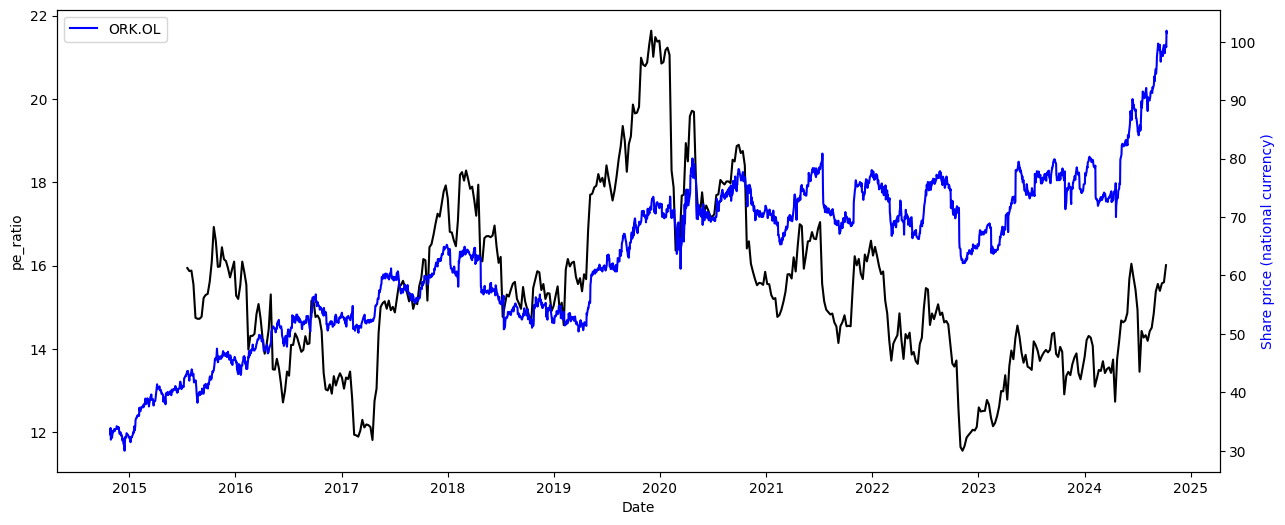

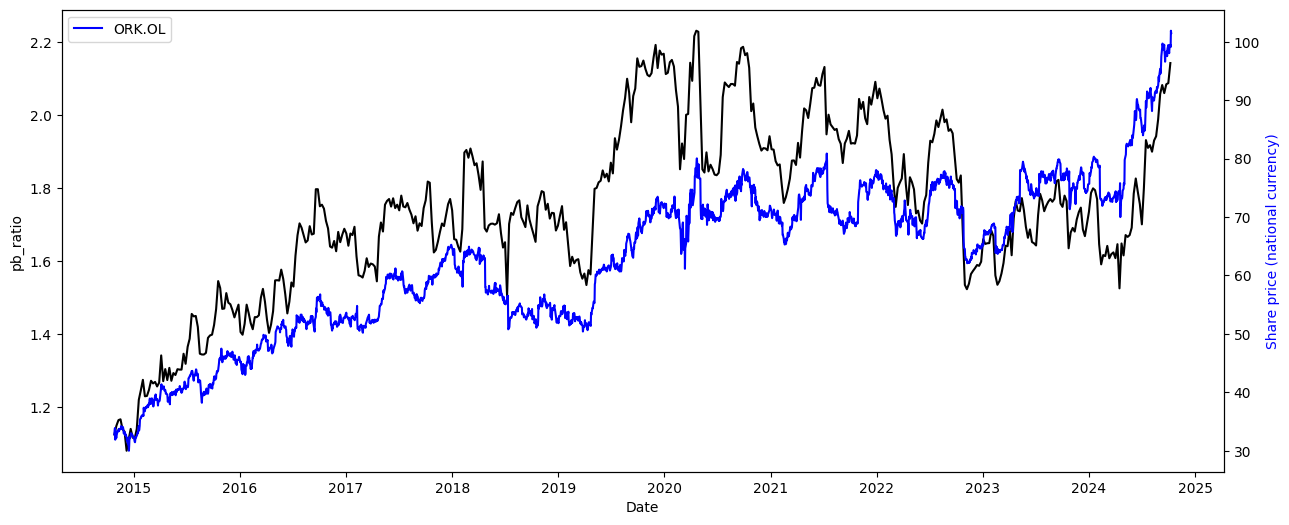

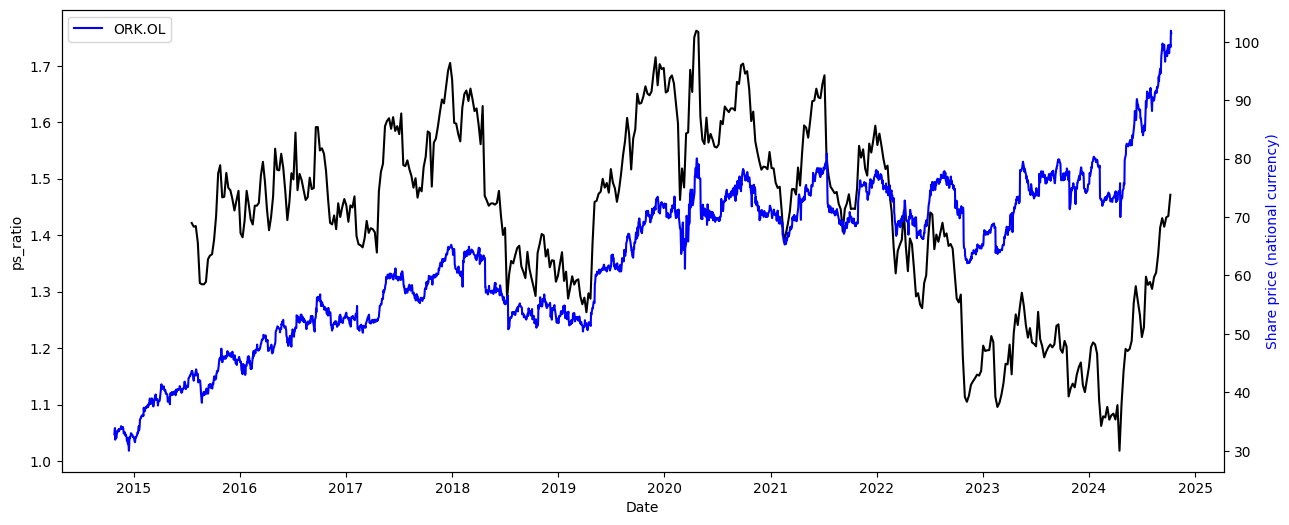

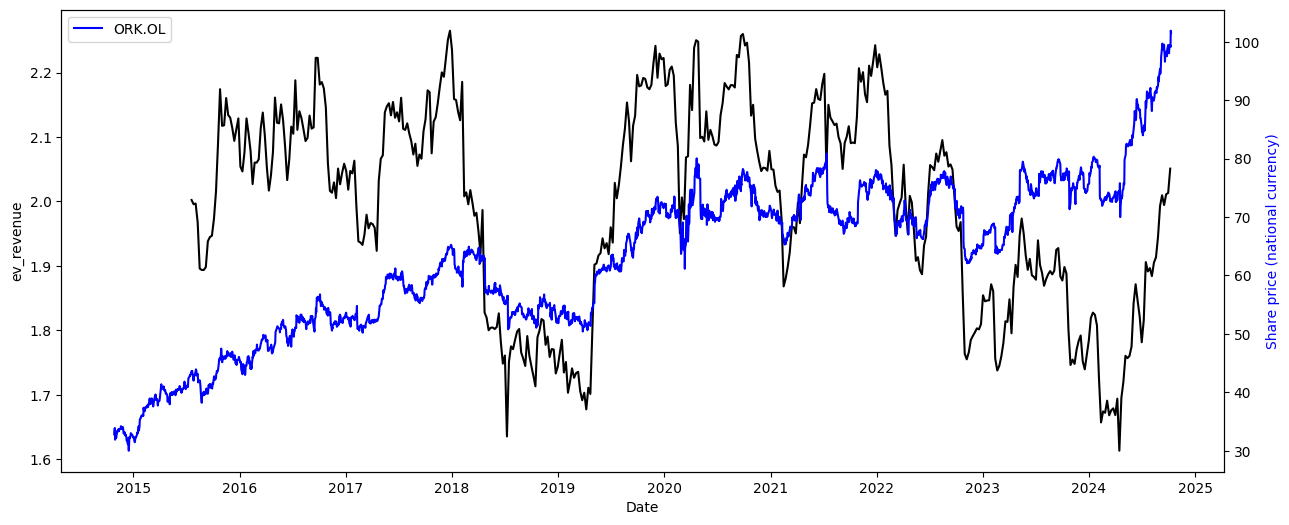

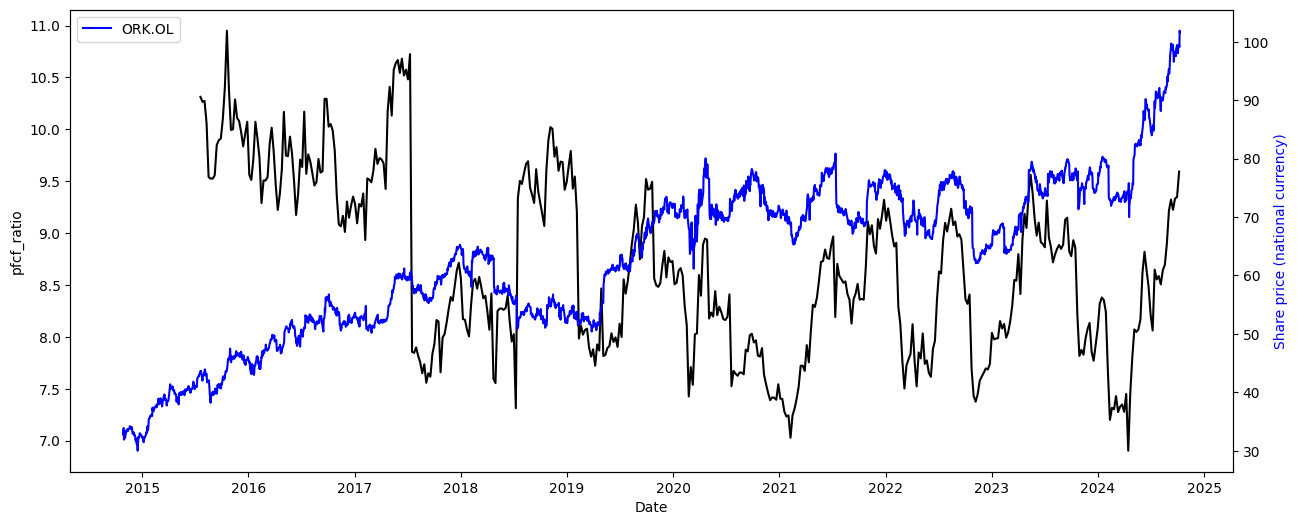

In [18]:
for column in merged_nat_curr.columns[3:]:
    fig, ax1 = plt.subplots(figsize=(15, 6))

    ax2 = ax1.twinx()
    ax1.plot(merged_nat_curr['real_date'], merged_nat_curr[column], color='k', label=merged_nat_curr)
    ax2.plot(ticker_all_price.index, ticker_all_price['Close'], color='b', label=share_name)

    ax1.set_xlabel('Date')
    ax1.set_ylabel(column, color='k')
    ax2.set_ylabel('Share price (national currency)', color='b')

    plt.legend()
    plt.show()

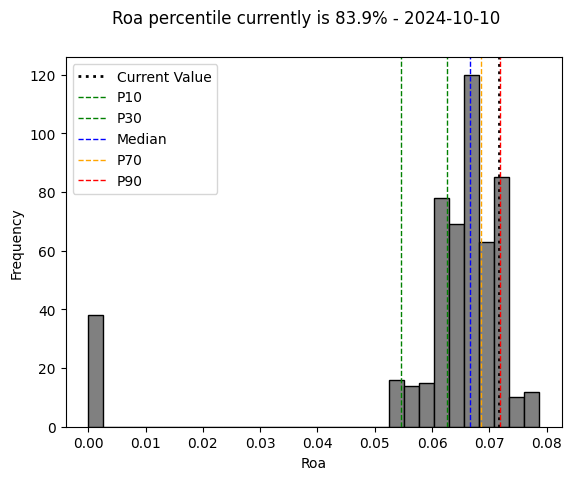

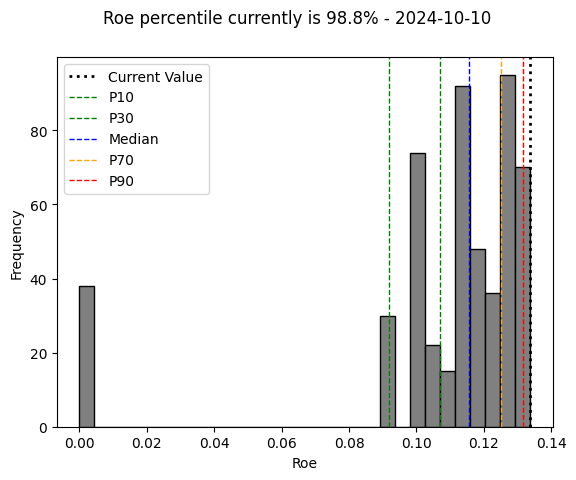

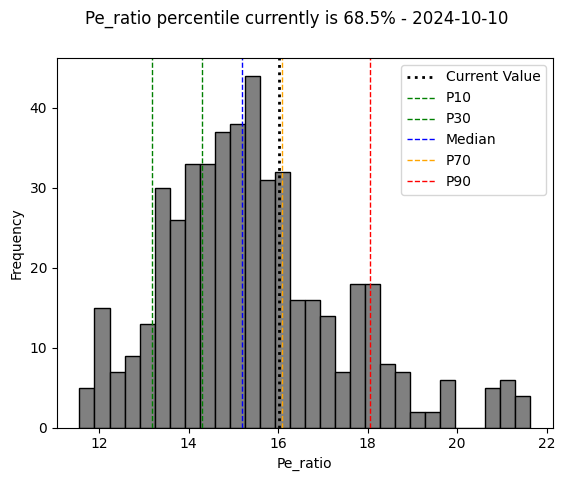

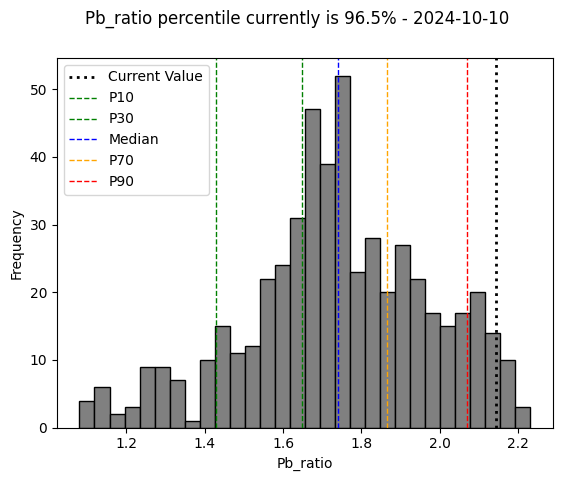

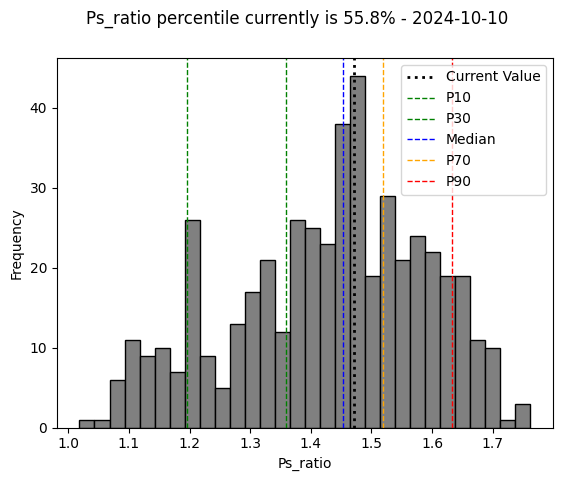

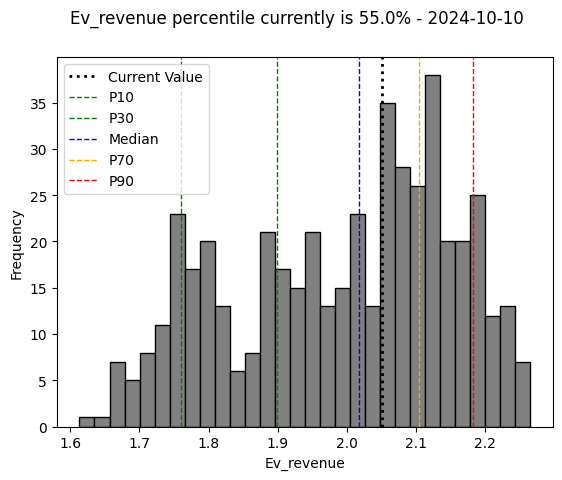

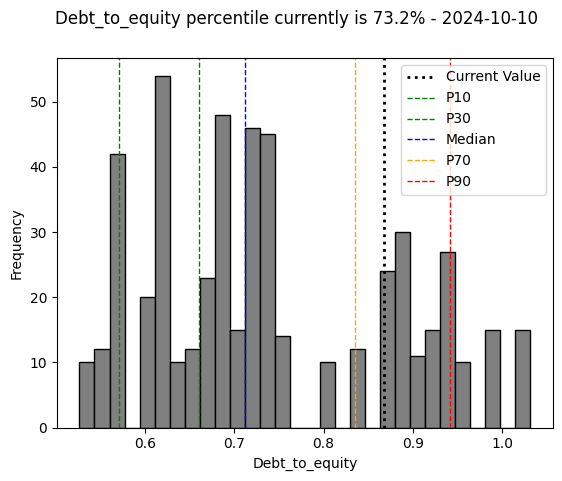

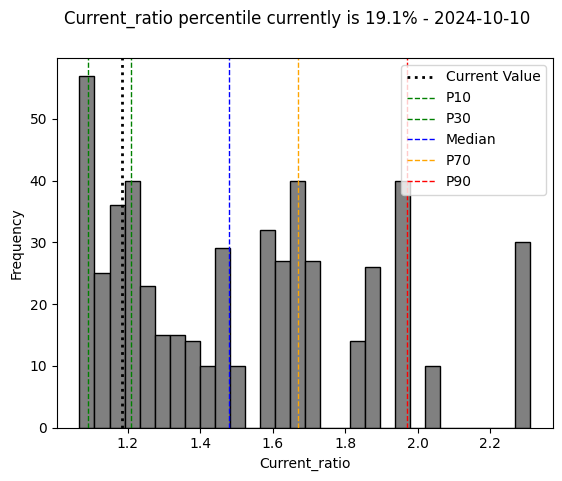

In [19]:
# plot histograms of value parameters
utils.plot_histogram_value_parameters(input_df=merged_nat_curr, extra_parameters=[], owned_shares=owned_shares)

## Calculate correlation between value parameters

In [20]:
# calulate value parameters Pearson's correlation coefficient
pd.DataFrame(merged_nat_curr, columns=['roa', 'roe', 'pe_ratio', 'pb_ratio', 'ps_ratio', 'ev_revenue', 'debt_to_equity', 'current_ratio']).corr()

,roa,roe,pe_ratio,pb_ratio,ps_ratio,ev_revenue,debt_to_equity,current_ratio
roa,1.000000,0.963037,-0.356831,0.620460,0.032615,-0.085096,0.149793,-0.377969
roe,0.963037,1.000000,-0.559962,0.637764,-0.355172,-0.117715,0.408289,-0.551455
pe_ratio,-0.356831,-0.559962,1.000000,0.626776,0.741625,0.502258,-0.412640,0.228236
pb_ratio,0.620460,0.637764,0.626776,1.000000,0.536031,0.478675,0.227603,-0.484815
ps_ratio,0.032615,-0.355172,0.741625,0.536031,1.000000,0.853623,-0.518004,0.378926
ev_revenue,-0.085096,-0.117715,0.502258,0.478675,0.853623,1.000000,-0.093807,0.147698
debt_to_equity,0.149793,0.408289,-0.412640,0.227603,-0.518004,-0.093807,1.000000,-0.738063
current_ratio,-0.377969,-0.551455,0.228236,-0.484815,0.378926,0.147698,-0.738063,1.000000


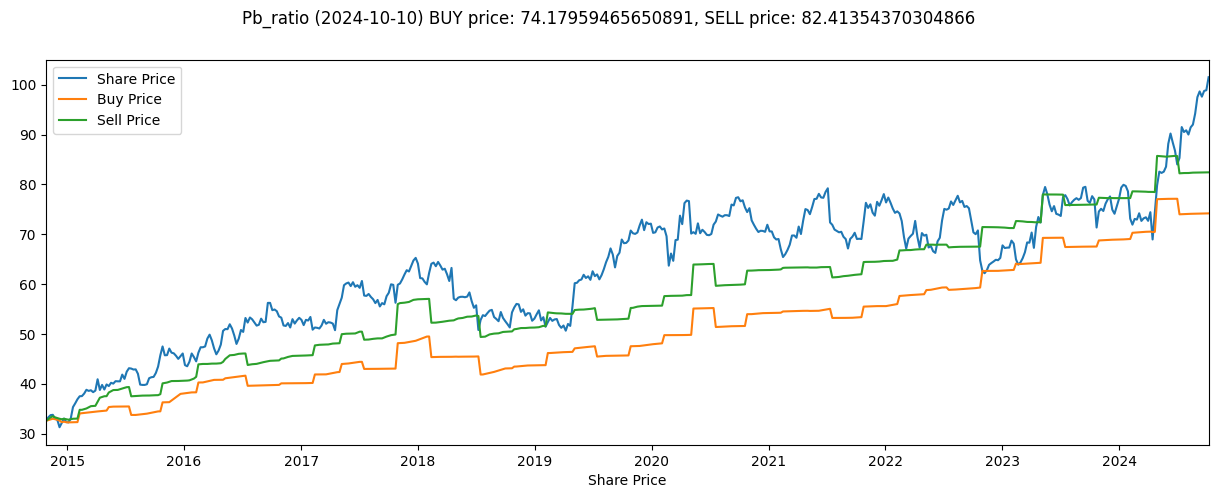

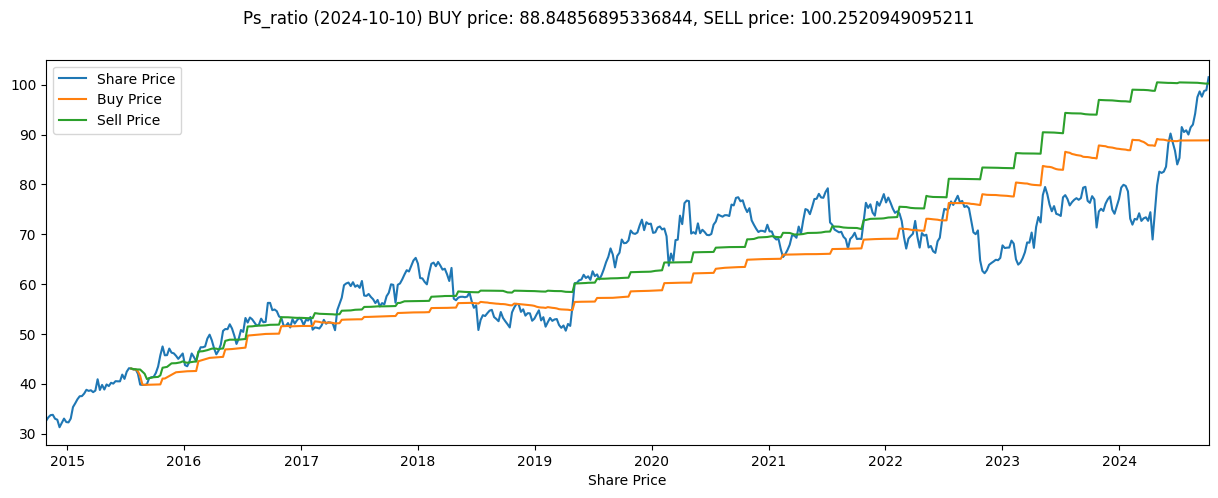

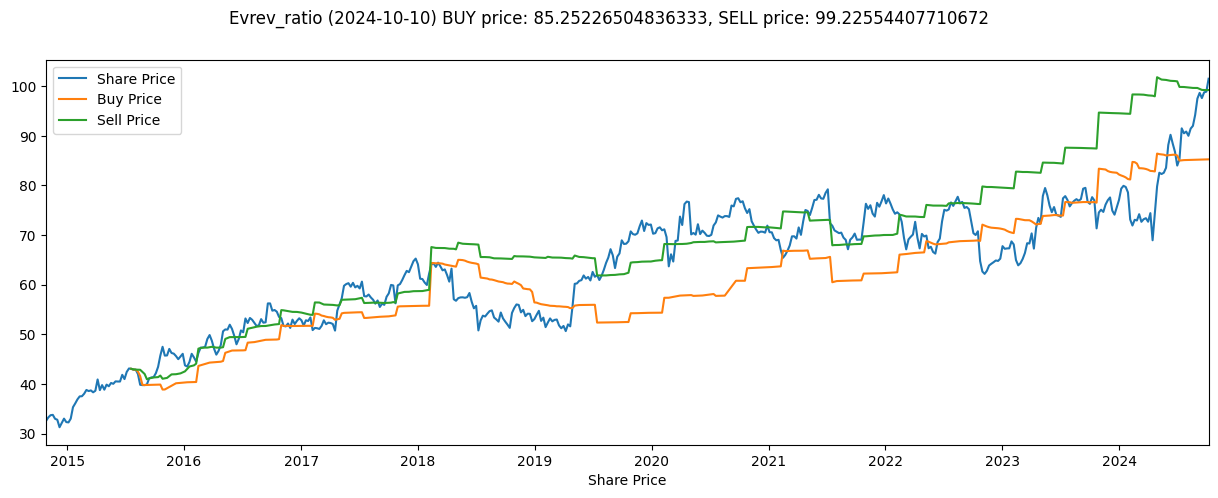

In [21]:
final_df = utils.get_value_stock_target_prices(
    input_df=merged_nat_curr,
    min_pct=0.2,
    max_pct=0.5,
    owned_shares=owned_shares
)